In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix

In [2]:
df = pd.read_csv("Thyroid_Diff.csv")

In [3]:
df.shape

(383, 17)

In [4]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [6]:
# df.describe()

In [7]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [8]:
df.isna().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [9]:
pd.value_counts(df['Smoking'])

No     334
Yes     49
Name: Smoking, dtype: int64

In [10]:
pd.value_counts(df['Hx Smoking'])

No     355
Yes     28
Name: Hx Smoking, dtype: int64

In [11]:
pd.value_counts(df['Hx Radiothreapy'])

No     376
Yes      7
Name: Hx Radiothreapy, dtype: int64

In [12]:
pd.value_counts(df['Adenopathy'])

No           277
Right         48
Bilateral     32
Left          17
Extensive      7
Posterior      2
Name: Adenopathy, dtype: int64

In [13]:
pd.value_counts(df['Focality'])

Uni-Focal      247
Multi-Focal    136
Name: Focality, dtype: int64

In [14]:
pd.value_counts(df['Gender'])

F    312
M     71
Name: Gender, dtype: int64

In [15]:
pd.value_counts(df['M'])

M0    365
M1     18
Name: M, dtype: int64

In [16]:
pd.value_counts(df['N'])

N0     268
N1b     93
N1a     22
Name: N, dtype: int64

In [17]:
pd.value_counts(df['T'])

T2     151
T3a     96
T1a     49
T1b     43
T4a     20
T3b     16
T4b      8
Name: T, dtype: int64

In [18]:
pd.value_counts(df['Pathology'])

Papillary         287
Micropapillary     48
Follicular         28
Hurthel cell       20
Name: Pathology, dtype: int64

In [19]:
pd.value_counts(df['Physical Examination'])

Multinodular goiter            140
Single nodular goiter-right    140
Single nodular goiter-left      89
Normal                           7
Diffuse goiter                   7
Name: Physical Examination, dtype: int64

In [20]:
pd.value_counts(df['Recurred'])

No     275
Yes    108
Name: Recurred, dtype: int64

In [21]:
pd.value_counts(df['Response'])

Excellent                 208
Structural Incomplete      91
Indeterminate              61
Biochemical Incomplete     23
Name: Response, dtype: int64

In [22]:
pd.value_counts(df['Risk'])

Low             249
Intermediate    102
High             32
Name: Risk, dtype: int64

In [23]:
pd.value_counts(df['Stage'])

I      333
II      32
IVB     11
III      4
IVA      3
Name: Stage, dtype: int64

In [24]:
pd.value_counts(df['Thyroid Function'])

Euthyroid                      332
Clinical Hyperthyroidism        20
Subclinical Hypothyroidism      14
Clinical Hypothyroidism         12
Subclinical Hyperthyroidism      5
Name: Thyroid Function, dtype: int64

In [25]:
# def pre_process(columns):
#     label = LabelEncoder()
#     for col in columns:
#         df[col] = label.fit_transform(df[col])

In [26]:
# cols = df.columns[1:]
# pre_process(cols)

In [27]:
cols = ['Risk', 'Stage', 'Thyroid Function', 'Response', 'Physical Examination', 'Pathology', 'T', 'N', 'Adenopathy']

risk_df = pd.get_dummies(df['Risk'])
stage_df = pd.get_dummies(df['Stage'])
thyroid_df = pd.get_dummies(df['Thyroid Function'])
response_df = pd.get_dummies(df['Response'])
physical_df = pd.get_dummies(df['Physical Examination'])
pathology_df = pd.get_dummies(df['Pathology'])
t_df = pd.get_dummies(df['T'])
n_df = pd.get_dummies(df['N'])
adenopathy = pd.get_dummies(df['Adenopathy'])

In [28]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [29]:
label = LabelEncoder()
df['Gender'] = label.fit_transform(df['Gender'])
df['Smoking'] = label.fit_transform(df['Smoking'])
df['Hx Smoking'] = label.fit_transform(df['Hx Smoking'])
df['Hx Radiothreapy'] = label.fit_transform(df['Hx Radiothreapy'])
df['Focality'] = label.fit_transform(df['Focality'])
df['M']= label.fit_transform(df['M'])
df['Recurred'] = label.fit_transform(df['Recurred'])

In [30]:
temp_df = df.drop(columns=cols)

In [31]:
temp_df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Focality',
       'M', 'Recurred'],
      dtype='object')

In [32]:
temp_df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Focality,M,Recurred
0,27,0,0,0,0,1,0,0
1,34,0,0,1,0,1,0,0
2,30,0,0,0,0,1,0,0
3,62,0,0,0,0,1,0,0
4,62,0,0,0,0,0,0,0


In [33]:
y = df['Recurred']
temp_df.drop(columns=['Recurred'], inplace=True)

In [34]:
temp_df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Focality,M
0,27,0,0,0,0,1,0
1,34,0,0,1,0,1,0
2,30,0,0,0,0,1,0
3,62,0,0,0,0,1,0
4,62,0,0,0,0,0,0


In [104]:
X_df = pd.concat([temp_df, risk_df, stage_df, thyroid_df, adenopathy, t_df, n_df, response_df, pathology_df, physical_df], axis=1)

In [105]:
X_df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Focality',
       'M', 'High', 'Intermediate', 'Low', 'I', 'II', 'III', 'IVA', 'IVB',
       'Clinical Hyperthyroidism', 'Clinical Hypothyroidism', 'Euthyroid',
       'Subclinical Hyperthyroidism', 'Subclinical Hypothyroidism',
       'Bilateral', 'Extensive', 'Left', 'No', 'Posterior', 'Right', 'T1a',
       'T1b', 'T2', 'T3a', 'T3b', 'T4a', 'T4b', 'N0', 'N1a', 'N1b',
       'Biochemical Incomplete', 'Excellent', 'Indeterminate',
       'Structural Incomplete', 'Follicular', 'Hurthel cell', 'Micropapillary',
       'Papillary', 'Diffuse goiter', 'Multinodular goiter', 'Normal',
       'Single nodular goiter-left', 'Single nodular goiter-right'],
      dtype='object')

In [106]:
X_df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Focality,M,High,Intermediate,Low,...,Structural Incomplete,Follicular,Hurthel cell,Micropapillary,Papillary,Diffuse goiter,Multinodular goiter,Normal,Single nodular goiter-left,Single nodular goiter-right
0,27,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,34,0,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
2,30,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,62,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,62,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0


In [40]:
X = X_df.values
y = y.values

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [44]:
x_train[0]

array([51,  1,  0,  0,  0,  1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1],
      dtype=int64)

In [45]:
x_train.shape

(306, 49)

In [49]:
logistic = LogisticRegression(max_iter=200)
logistic.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [50]:
y_pred = logistic.predict(x_test)

In [51]:
accuracy_score(y_test, y_pred)

0.948051948051948

In [53]:
confusion_matrix(y_pred, y_test)

array([[51,  3],
       [ 1, 22]], dtype=int64)

In [100]:
minmax = MinMaxScaler()
X_df = minmax.fit_transform(X_df)

In [101]:
X_df[0]

array([0.17910448, 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        ])

# Feature Selection Methods
## Filter Methods
### 1. Variance Threshold

In [54]:
from sklearn.feature_selection import VarianceThreshold

In [63]:
features = VarianceThreshold()
features.fit_transform(X_df)

array([[0.17910448, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.28358209, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.2238806 , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.85074627, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.68656716, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.7761194 , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [65]:
# feature_names = X_df.columns
for feature in zip(feature_names, features.variances_):
        print(feature)

('Age', 0.050892148243594344)
('Gender', 0.1510133684188999)
('Smoking', 0.1115693746634035)
('Hx Smoking', 0.06776240890591657)
('Hx Radiothreapy', 0.017942722358186367)
('Focality', 0.22900149295448194)
('M', 0.044788634457934816)
('High', 0.07657015863493517)
('Intermediate', 0.19539297425164806)
('Low', 0.22746081846627897)
('I', 0.11350544348928683)
('II', 0.07657015863493512)
('III', 0.010334789929715248)
('IVA', 0.007771543878545766)
('IVB', 0.02789575223772744)
('Clinical Hyperthyroidism', 0.049492463647580934)
('Clinical Hypothyroidism', 0.030349923988847144)
('Euthyroid', 0.11542787802766398)
('Subclinical Hyperthyroidism', 0.012884401693378508)
('Subclinical Hypothyroidism', 0.03521736462856794)
('Bilateral', 0.07657015863493513)
('Extensive', 0.017942722358186364)
('Left', 0.042416268431852415)
('No', 0.2001649748788253)
('Posterior', 0.005194663539870066)
('Right', 0.10961967155001397)
('T1a', 0.11156937466340355)
('T1b', 0.09966664167047291)
('T2', 0.23881817995896076)
('

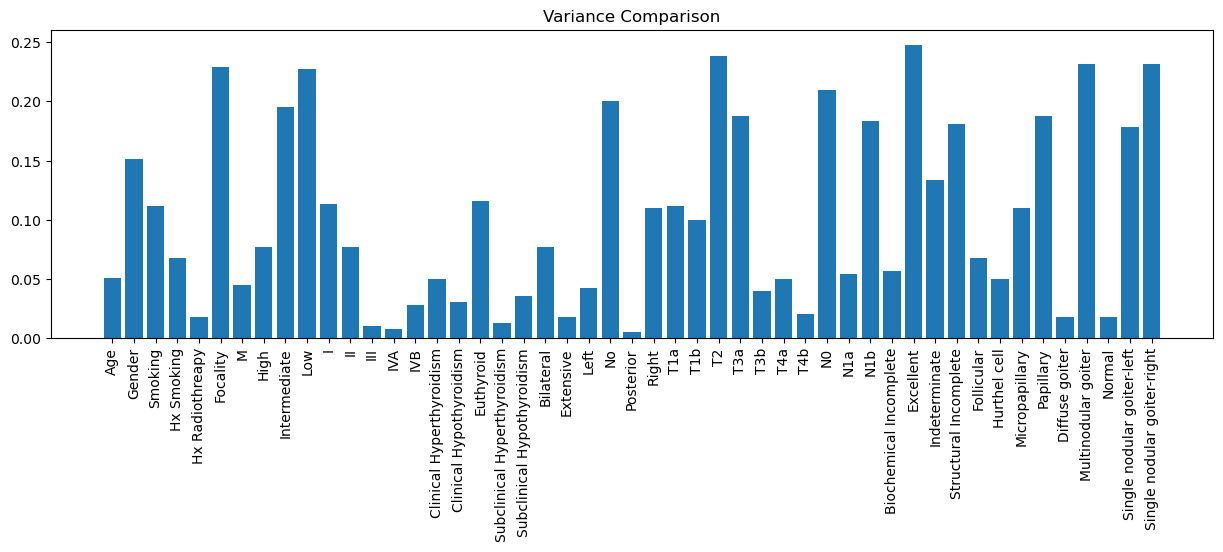

In [66]:
plt.figure(figsize=(15,4))
plt.bar(x=feature_names, height=features.variances_)
plt.xticks(rotation='vertical')
plt.title("Variance Comparison")
plt.show()

In [67]:
threshold = 0.05
selector = VarianceThreshold(threshold=threshold)

X_new = selector.fit_transform(X_df)
print(X_new.shape)

(383, 31)


In [68]:
X_new[0]

array([0.17910448, 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        ])

In [81]:
def logistic_model(X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)
    logistic = LogisticRegression(max_iter=200)
    logistic.fit(x_train, y_train)
    y_pred = logistic.predict(x_test)
    print("Accuracy Score :",accuracy_score(y_test, y_pred))
    print("Confusion Matrix")
    print(confusion_matrix(y_test, y_pred))

In [82]:
logistic_model(X_new, y)

Accuracy Score : 0.987012987012987
Confusion Matrix
[[51  0]
 [ 1 25]]


### 2. ANOVA F-Value

In [83]:
from sklearn.feature_selection import f_classif

In [85]:
f_value = f_classif(X_df, y)

for feature in zip(feature_names, f_value[0]):
    print(feature)

('Age', 27.372236330581025)
('Gender', 45.99032580566212)
('Smoking', 47.59584481205756)
('Hx Smoking', 7.18766641055318)
('Hx Radiothreapy', 11.95271904779773)
('Focality', 65.80773286191176)
('M', 54.71279373368146)
('High', 115.18482891301359)
('Intermediate', 103.71259562254735)
('Low', 383.509635819148)
('I', 125.49301296344967)
('II', 48.17000901025111)
('III', 10.52169110263105)
('IVA', 7.8161133905259215)
('IVB', 31.02271809641733)
('Clinical Hyperthyroidism', 1.814670645736942)
('Clinical Hypothyroidism', 0.811126732275558)
('Euthyroid', 2.1452735409551504)
('Subclinical Hyperthyroidism', 1.9895561357702345)
('Subclinical Hypothyroidism', 0.40372363036145115)
('Bilateral', 63.10775011144367)
('Extensive', 18.959879016622292)
('Left', 16.38093689996038)
('No', 242.90688823046696)
('Posterior', 5.161584314498251)
('Right', 34.605638792050165)
('T1a', 19.874465705349515)
('T1b', 6.648775451499241)
('T2', 29.50740195671847)
('T3a', 13.729635317781288)
('T3b', 31.214051422906646)
(

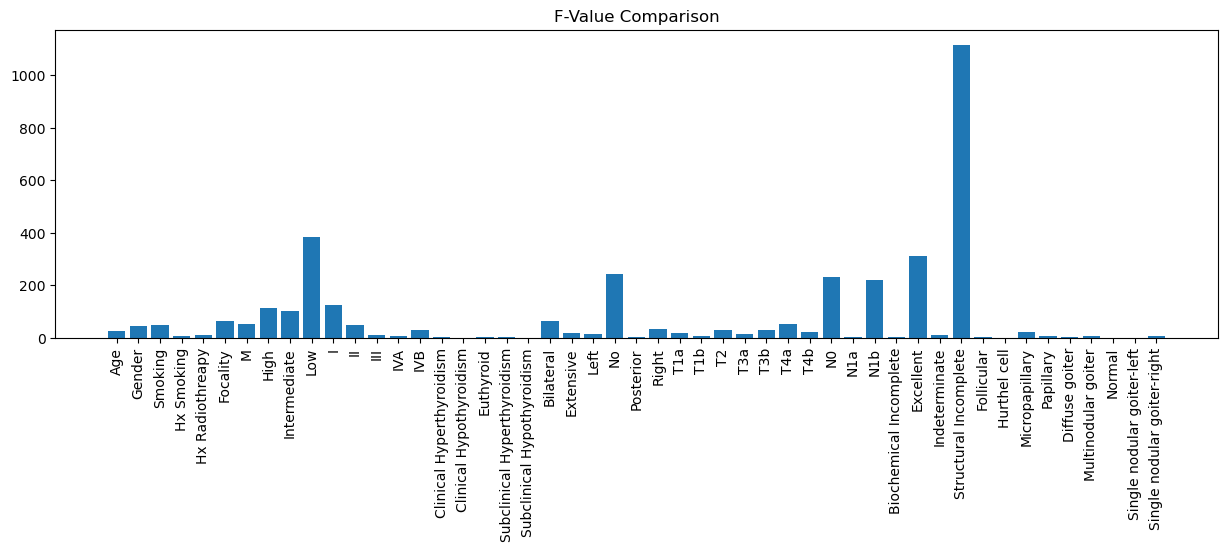

In [88]:
plt.figure(figsize=(15,4))
plt.bar(x=feature_names, height=f_value[0])
plt.xticks(rotation='vertical')
plt.title("F-Value Comparison")
plt.show()

### 3. Mutual Information 

In [86]:
from sklearn.feature_selection import mutual_info_classif

In [87]:
mutual_score = mutual_info_classif(X_df, y)

for feature in zip(feature_names, mutual_score):
    print(feature)

('Age', 0.020909472907101323)
('Gender', 0.033515858146043964)
('Smoking', 0.03915140145956797)
('Hx Smoking', 0.014336095613838307)
('Hx Radiothreapy', 0.0)
('Focality', 0.07933983179018544)
('M', 0.09271410482104647)
('High', 0.11892703028061713)
('Intermediate', 0.07325526030353036)
('Low', 0.25193362565529887)
('I', 0.1066898331974575)
('II', 0.06872680978608003)
('III', 0.030340189004234297)
('IVA', 0.0)
('IVB', 0.010496802770917135)
('Clinical Hyperthyroidism', 0.012834268023380613)
('Clinical Hypothyroidism', 0.01514470392964462)
('Euthyroid', 0.013945502735968951)
('Subclinical Hyperthyroidism', 0.009531507309546328)
('Subclinical Hypothyroidism', 0.0034979965279073877)
('Bilateral', 0.04885490842579676)
('Extensive', 0.007801711478039319)
('Left', 0.023845592122495374)
('No', 0.1859594852354327)
('Posterior', 0.0)
('Right', 0.024223074963722002)
('T1a', 0.07244145756759668)
('T1b', 0.0)
('T2', 0.07232191182618042)
('T3a', 0.02249814197368294)
('T3b', 0.03968488204033527)
('T4a

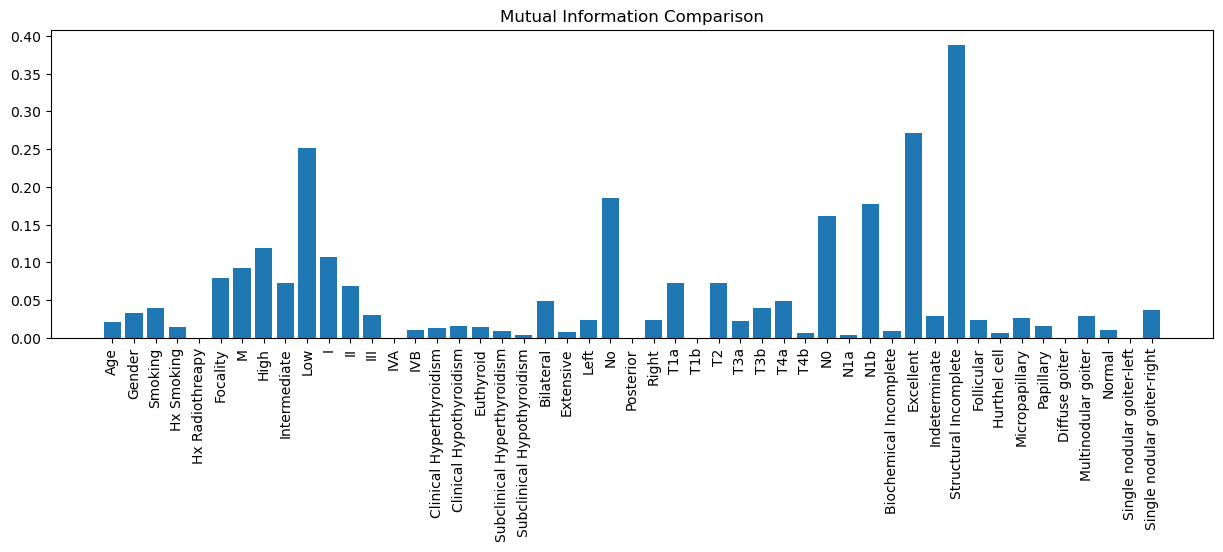

In [89]:
plt.figure(figsize=(15,4))
plt.bar(x=feature_names, height=mutual_score)
plt.xticks(rotation='vertical')
plt.title("Mutual Information Comparison")
plt.show()

## Wrapper Methods
### 1. EFS - Exhaustive Feature Selection

In [91]:
# !pip install mlxtend

In [92]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [114]:
clf = LogisticRegression()
efs = EFS(estimator=clf, min_features=1, max_features=5, scoring="accuracy", cv=5)

efs = efs.fit(X_df, y)
print("Best Accuracy score :", efs.best_score_)
print("Best subset (indices) :", efs.best_idx_)
print("Best subset (feature_name) :", efs.best_feature_names_)

KeyboardInterrupt: 

### 2. SFS - Sequential Forward Selection 

In [95]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [109]:
clf = LogisticRegression(max_iter=200)
sfs = SFS(estimator=clf, k_features=(1, 8), forward=True, scoring="accuracy", cv=5)

sfs = sfs.fit(X_df, y)
print("Best Accuracy score :", sfs.k_score_)
print("Best subset (indices) :", sfs.k_feature_idx_)
print("Best subset (feature_name) :", sfs.k_feature_names_)

Best Accuracy score : 0.9557416267942583
Best subset (indices) : (0, 1, 36, 39)
Best subset (feature_name) : ('Age', 'Gender', 'Biochemical Incomplete', 'Structural Incomplete')


In [111]:
X_sfs_df = sfs.transform(X_df)

In [113]:
X_sfs_df.shape

(383, 4)